### St Michael Bay

**Station Name:**  at01

**Location:**  St Michael, Alaska

**Archive:**  [UNAVCO](http://www.unavco.org)

**Ellipsoidal Coordinates:**

- Latitude:  63.4840

- Longitude: -162.0064

- Height: 21.7 m

[Station Page at UNAVCO](https://www.unavco.org/instrumentation/networks/status/nota/overview/AT01)

[Station Page at Nevada Geodetic Laboratory](http://geodesy.unr.edu/NGLStationPages/stations/AT01.sta)

[Google Map Link](https://goo.gl/maps/uWyoNFf4DRjYLmfUA)

<p align="center">
<img src="https://www.unavco.org/data/gps-gnss/lib/images/station_images/AT01.jpg" width="500">
</p>

## Data Summary

at01 has good visibility over a large azimuthal region and the monument is about a meter taller than normal geodetic monuments which helps improve visibility of the sea surface. At01 observes all constellation signals.

## Imports

In [1]:
import ipywidgets as widgets
import os

from pathlib import Path

from gnssrefl.utils import check_environment, set_environment, get_sys

notebook_dir = Path.cwd().parents[1]

# Making sure environment variables are set - this is required to run the gnssrefl code
exists = check_environment()
if exists == False:
    set_environment(refl_code=str(notebook_dir),
                    orbits=str(notebook_dir / "orbits"),
                    exe=str(notebook_dir / "exe"))
    
#If you are running this locally - make sure the items in the exe folder have execution permissions

# Set local variable of refl_code location
refl_code_loc = os.environ['REFL_CODE']
print("refl_code location:", refl_code_loc)

# import gnssrefl functions
from gnssrefl.installexe_cl import installexe
from gnssrefl.rinex2snr_cl import rinex2snr
from gnssrefl.quickLook_cl import quicklook
from gnssrefl.gnssir_cl import gnssir
from gnssrefl.gnssir_input import make_gnssir_input
from gnssrefl.subdaily_cl import subdaily


# import the crx2rnx file which is dependent on your working OS - this is required to run the gnssrefl code
# If in docker environment, then you do not need to download crxnrnx
try:
    os.environ['DOCKER']
except KeyError:
    sys = get_sys()
    installexe(sys)

environment variable ORBITS set to path /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits 
environment variable REFL_CODE set to path /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks 
environment variable EXE set to path /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/exe
refl_code location: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks
Your executable environment area:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/exe
There is no teqc executable for this architecture, so none will be installed.
This Hatanaka executable already exists
The gfzrnx executable already exists


# reflecion zone app

now we can use the reflection zone part of the web app:

In [2]:
%%html
<iframe src="https://gnss-reflections.org/geoid" width="1000" height="600"></iframe>

Next, we could look at the reflection zone app to pick a possible mask.

In [3]:
%%html
<iframe src="https://gnss-reflections.org/rzones" width="1000" height="700"></iframe>

Just looking at this can give us an idea of the possible azimuth mask - Guessing we will not get good retrievals in the northwest quadrant. We will confirm this with the qc plots when we use quicklook.

It's also useful to note that it is about 12 meters above sea level.

### Take a Quick Look at the Data
First examine the spectral characteristics of the SNR data.

First, we download a snr file using rinex2snr. We will pick a year and day - in this case we'll look at day of year 109 for the year 2020. 

In [4]:
# Download SNR 
# we are going to just pick a year and day
# this will generate a SNR file at a sampling rate of 15 seconds.
station = 'at01'
year=2020
doy=109

rinex2snr(station=station, year=year, doy=doy, archive='unavco', orb='gnss')

Using GBM orbit archived at CDDIS
at01  year: 2020  doy: 109 from:  unavco
sp3 filename  gbm21016.sp3
/gps/products/mgex/2101/ GFZ0MGXRAP_20201090000_01D_05M_ORB.SP3.gz
/gps/products/2101/ GFZ0MGXRAP_20201090000_01D_05M_ORB.SP3.gz
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2020/sp3/GFZ0MGXRAP_20201090000_01D_05M_ORB.SP3
https://data.unavco.org/archive/gnss/rinex/obs/2020/109/at011090.20d.Z
Seeking permission from Earthscope to use their archive
To complete the SSO authorization, please visit the following URL in a browser of your choice:
            https://login.earthscope.org/activate?user_code=FGWP-DDZH
            


SUCCESS: SNR file was created 
 /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2020/snr/at01/at011090.20.snr66
That took  298.83  seconds
Feedback written to subdirectory logs


Now we can run quicklook, this is what it will look like if we don't change any of the defualts:

minimum elevation angle (degrees) for this dataset:  0.0011
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/at01/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/at01/quickLook_summary.png


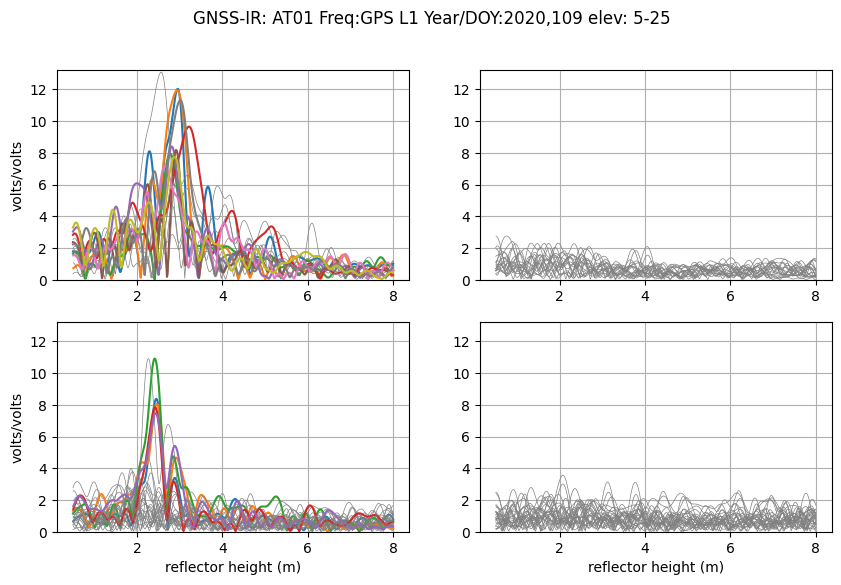

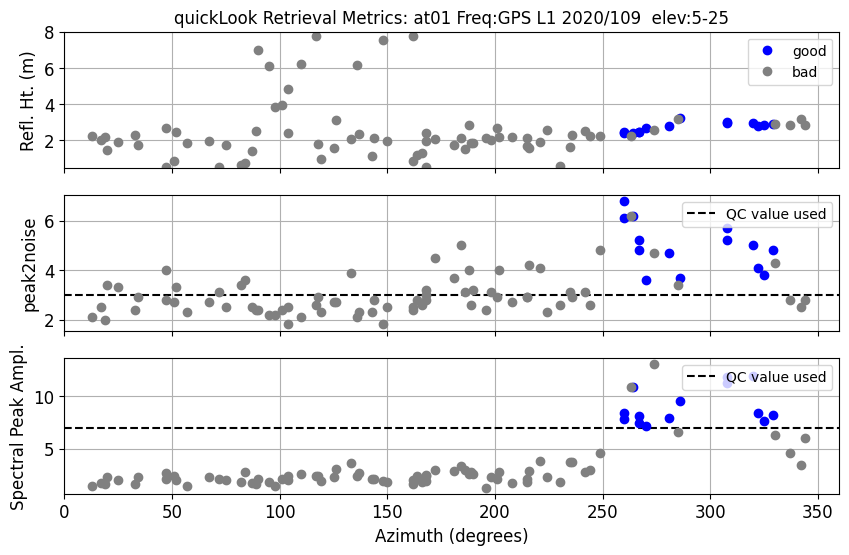

In [5]:
values, metrics = quicklook(station, year, doy=doy)

Using the default settings with quicklook we would likely think it is not a useful site, as nearly every retrieval is set as bad.

Let's see what the defaults are set to by adding a question mark to the function and running that cell.

In [6]:
quicklook?

Signature:
quicklook(
    station: str,
    year: int,
    doy: int,
    snr: int = 66,
    fr: int = 1,
    ampl: float = 7.0,
    e1: float = 5,
    e2: float = 25,
    h1: float = 0.5,
    h2: float = 8.0,
    sat: int = None,
    peak2noise: float = 3.0,
    screenstats: bool = False,
    fortran: bool = None,
    plt: bool = True,
    azim1: float = 0.0,
    azim2: float = 360.0,
    ediff: float = 2.0,
    delTmax: float = 75.0,
)
Docstring:
quickLook assessment of SNR reflectometry data. It creates two plots: one with periodograms for
four different quadrants (northwest, northeast, southeast, southwest) and the other with the RH
results shown as a function of azimuth. This plot also summarizes why the RH retrievals were accepted
or rejected in terms of the quality control parameters.  

Examples
--------
quickLook p041 2023 1 
    analyzes station p041 on day of year 1 in the year 2023 with defaults (L1, e1=5, e2=25)

quickLook p041 2023 1 -h1 1 -h2 10
    analyzes station p041 

Now we can see what the defaults are and information about the parameters in the doc string as well. 

So, remembering that the site is 12 meters above sea level and we can see that the default restricts the reflector height region to 0.5 to 6 meters. 

Let's try quicklook again using a reflector height region that includes the water surface. We'll set h1 to 8 and h2 to 15 and we're also going to change the elevation angles to 5 and 13 degrees:

minimum elevation angle (degrees) for this dataset:  0.0011
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/at01/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/at01/quickLook_summary.png


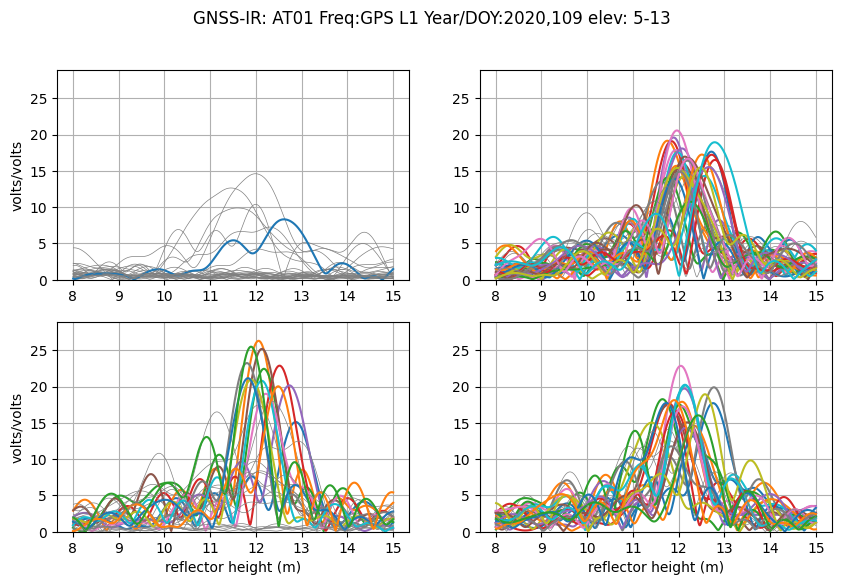

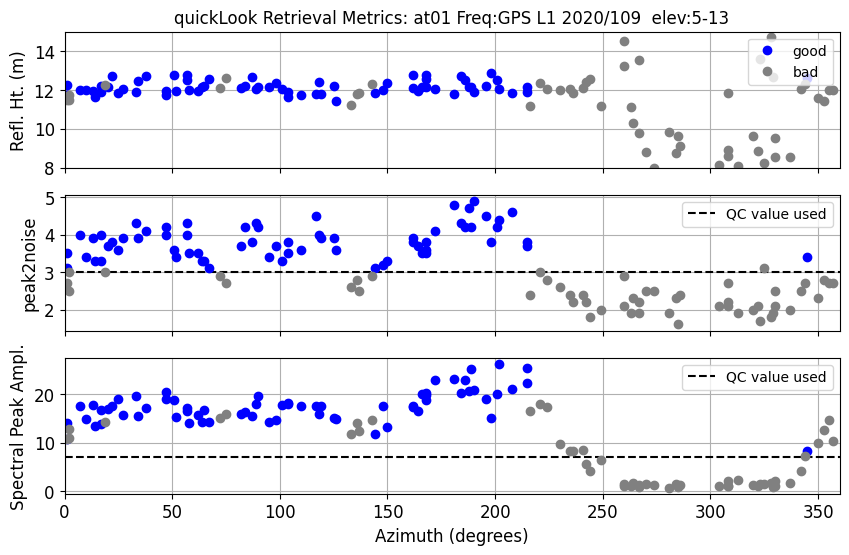

In [7]:
values, metrics = quicklook(station, year, doy=doy,
                                         e1=5, e2=13, h1=8, h2=15)

Now we see good retrievals at azimuths from true north to about 220 degrees (around what we expected from using the reflection zone app) and we also see strong retrievals in the Lomb Scargle periodograms.

This site does have modern GPS signals, as well as Galileo and Glonass signals.

results for L2C:

minimum elevation angle (degrees) for this dataset:  0.0011
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/at01/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/at01/quickLook_summary.png


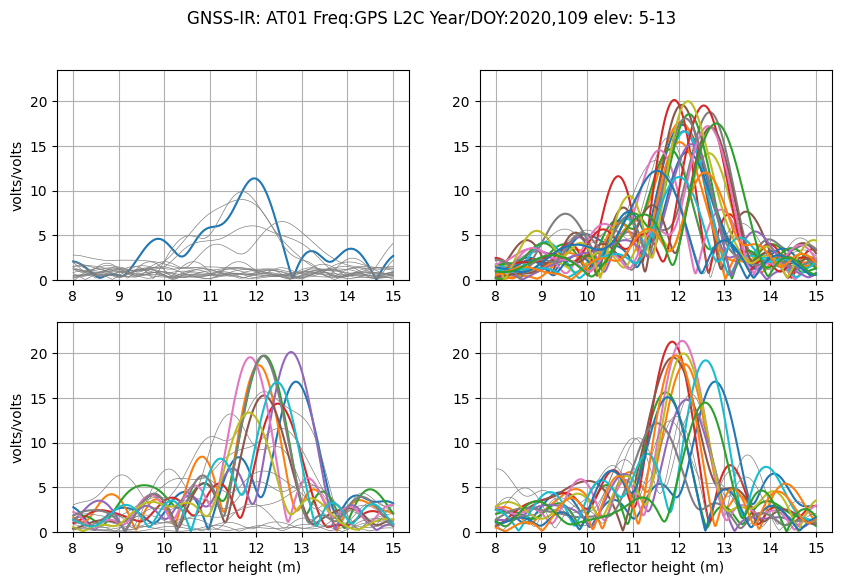

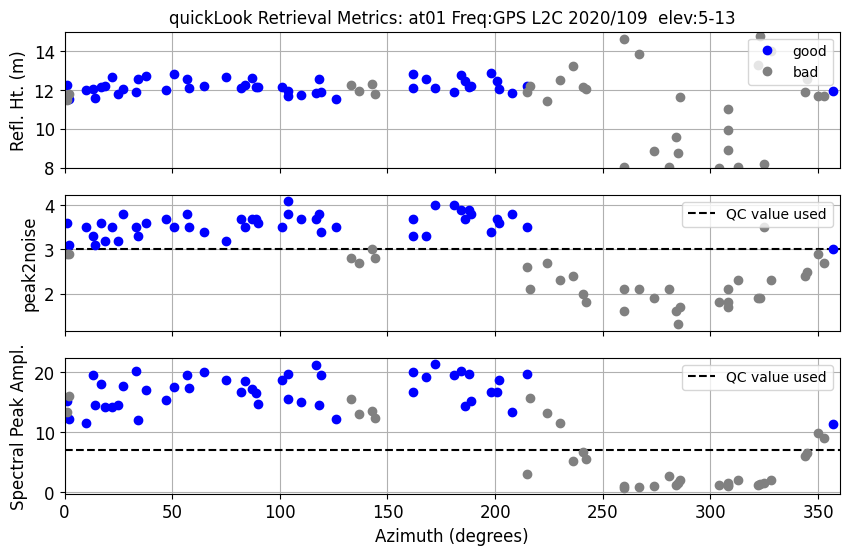

In [8]:
values, metrics = quicklook(station, year, doy=doy, 
                                         e1=5, e2=13, h1=8, h2=15, fr=20)

Now we can look at glonass by setting fr to 101 and Galileo we will set f to 205.

minimum elevation angle (degrees) for this dataset:  0.0011
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/at01/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/at01/quickLook_summary.png


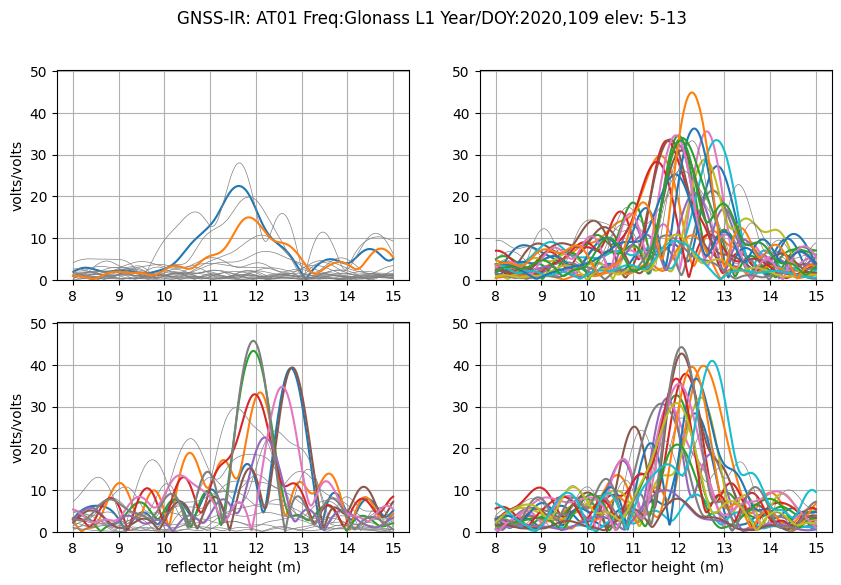

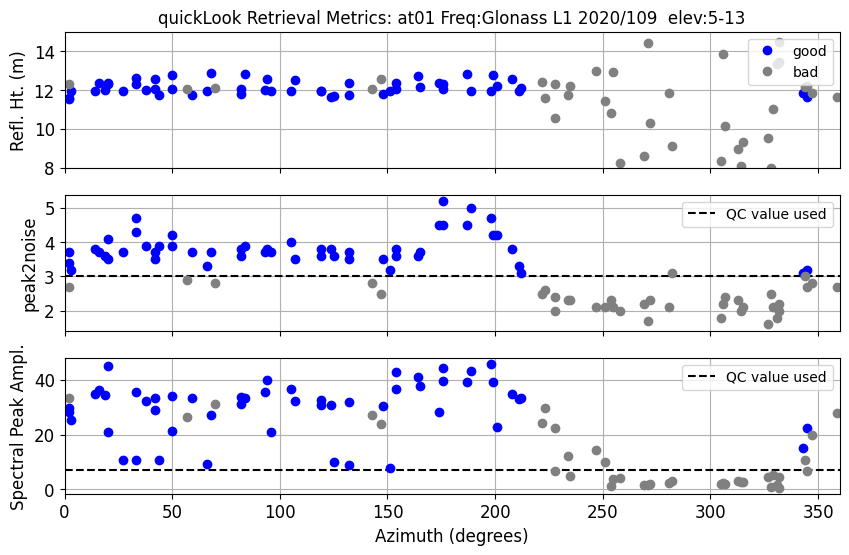

In [9]:
values_l1, metrics_l1 = quicklook(station, year, doy=doy,
                                         e1=5, e2=13, h1=8, h2=15, fr=101)

minimum elevation angle (degrees) for this dataset:  0.0011
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/at01/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/at01/quickLook_summary.png


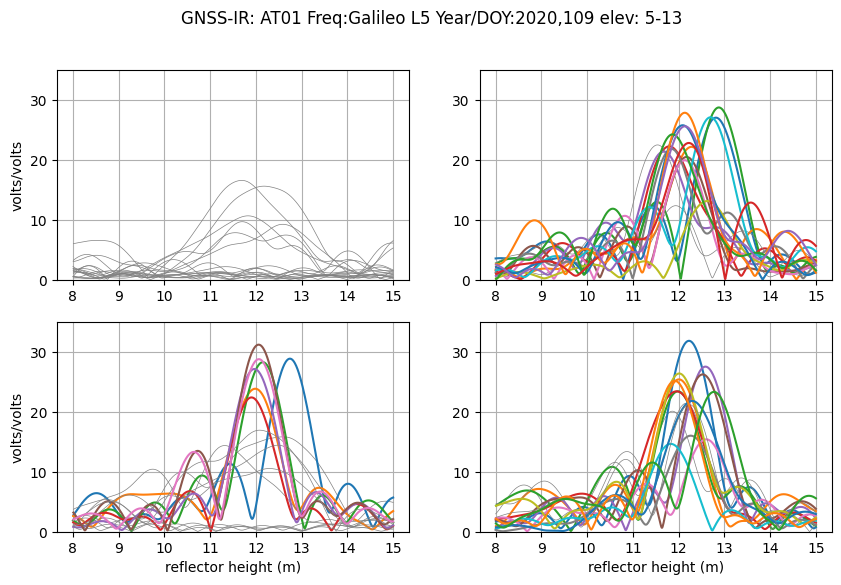

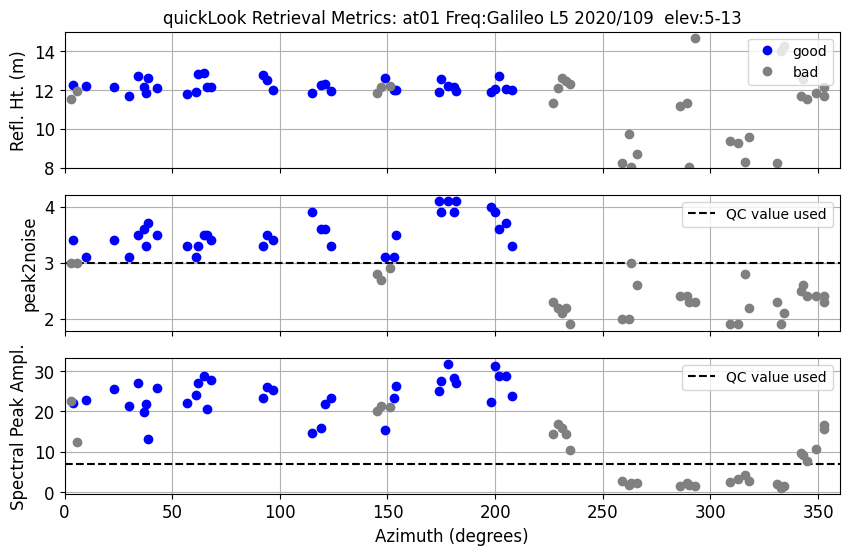

In [10]:
values_l2, metrics_l2 = quicklook(station, year, doy=doy,
                                         e1=5, e2=13, h1=8, h2=15, fr=205)

### Analyze the Data

Next we will analyze data for a few weeks in the fall of 2020. Our first step would be to make the SNR files.

In [11]:
rinex2snr?

Signature:
rinex2snr(
    station: str,
    year: int,
    doy: int,
    snr: int = 66,
    orb: str = None,
    rate: str = 'low',
    dec: int = 0,
    fortran: bool = False,
    nolook: bool = False,
    archive: str = 'all',
    doy_end: int = None,
    year_end: int = None,
    overwrite: bool = False,
    translator: str = 'hybrid',
    samplerate: int = 30,
    stream: str = 'R',
    mk: bool = False,
    weekly: bool = False,
    strip: bool = False,
    screenstats: bool = False,
)
Docstring:
rinex2snr translates RINEX files to a new file in SNR format. This function will also fetch orbit files for you.
RINEX obs files are provided by the user or fetched from a long list of archives. The default is RINEX 2.11 files

Default is GPS only until day of year 137, 2021 when rapid GFZ orbits became available.  If you still want to use
the nav message, i.e. GPS only, you can request it.

bkg no longer a boolean input - must be specified with archive name, i.e. bkg-igs or bkg-euref

Ex

In [12]:
rinex2snr(station, year, 230, doy_end=390, archive='unavco', orb='gnss')

Using GBM orbit archived at CDDIS
at01  year: 2020  doy: 230 from:  unavco
sp3 filename  gbm21191.sp3
/gps/products/mgex/2119/ GFZ0MGXRAP_20202300000_01D_05M_ORB.SP3.gz
/gps/products/2119/ GFZ0MGXRAP_20202300000_01D_05M_ORB.SP3.gz
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2020/sp3/GFZ0MGXRAP_20202300000_01D_05M_ORB.SP3
https://data.unavco.org/archive/gnss/rinex/obs/2020/230/at012300.20d.Z
Seeking permission from Earthscope to use their archive


SUCCESS: SNR file was created 
 /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2020/snr/at01/at012300.20.snr66
at01  year: 2020  doy: 231 from:  unavco
sp3 filename  gbm21192.sp3
/gps/products/mgex/2119/ GFZ0MGXRAP_20202310000_01D_05M_ORB.SP3.gz
/gps/products/2119/ GFZ0MGXRAP_20202310000_01D_05M_ORB.SP3.gz
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2020/sp3/GFZ0MGXRAP_20202310000_01D_05M_ORB.SP3
https://data.unavco.org/archive/gnss/rinex/obs/2020/231/at012310.20d.Z
Seeking permissi

The next step is to create the json file that gnssir reads with the values that we have decided on from the quicklook step. In this case we will set the elevation angles and the heights. We'll set the azimuth range that we decided on and are also going to remove the Beidou signals since they are not in rinex2 files.

In [14]:
make_gnssir_input(station, e1=5, e2=13, h1=8, h2=17, ampl=4, frlist=[1, 20, 5, 101, 102, 201, 205, 206, 207], azlist2=[20,220])

Assume you want to use the UNR database.
Implementing user-provided frequency list.
writing out to: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/at01.json


Next, we will run gnssir to estimate the reflector height (RH) for the two month time period.

In [15]:
gnssir(station, year, 230, doy_end=290)

{'station': 'at01', 'lat': 63.484045496, 'lon': -162.006400898, 'ht': 21.5651139, 'minH': 8, 'maxH': 17, 'e1': 5, 'e2': 13, 'NReg': [8, 17], 'PkNoise': 2.8, 'polyV': 4, 'pele': [5, 30], 'ediff': 2.0, 'desiredP': 0.005, 'azval2': [20, 220], 'freqs': [1, 20, 5, 101, 102, 201, 205, 206, 207], 'reqAmp': [4, 4, 4, 4, 4, 4, 4, 4, 4], 'refraction': True, 'overwriteResults': True, 'seekRinex': False, 'wantCompression': False, 'plt_screen': False, 'onesat': None, 'screenstats': False, 'pltname': 'at01_lsp.png', 'delTmax': 75.0, 'gzip': False, 'ellist': []}
refraction file exists
requested frequencies  [1, 20, 5, 101, 102, 201, 205, 206, 207]
Using the New Way of Selecting Arcs
Augmented elevation angle list []
Requested azimuths:  [20, 220]
Using azimuths:  [20, 220]
A station specific refraction output file will be written to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/at01_refr.txt
found  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/
The large refraction file shoul

We have do have some code to help you look at subdaily files. This will be helpful to look at tides. 

We will set an outlier criteria of 0.36 meters (one sigma 0.12 meters ==> 0.36 meters three sigma) to start with.

This preliminary version of the code removes outliers and makes an effort to compute the RH dot correction.

Will pick up and concatenate daily result files
Will remove daily outliers greater than  2.5  sigma
Plot to the screen has been set to  True
>>>>>>>>>>>>>>>>>>>>>>>> readin RH data <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Read in the RH retrievals for  2020  and these days:  230 290
Number of initial RH retrievals 20697
0  points removed for azimuth constraints  0 360
0  points removed for amplitude constraint 
0  points removed for peak2noise constraints 
RH retrievals after all commandline constraints 20697
png file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/at01/at01_Subnvals.png
Plot file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/at01/at01_combined.png
png file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/at01/at01_outliers_wrt_az.png
png file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/at01/at01_outliers.png
outliers written to file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/File

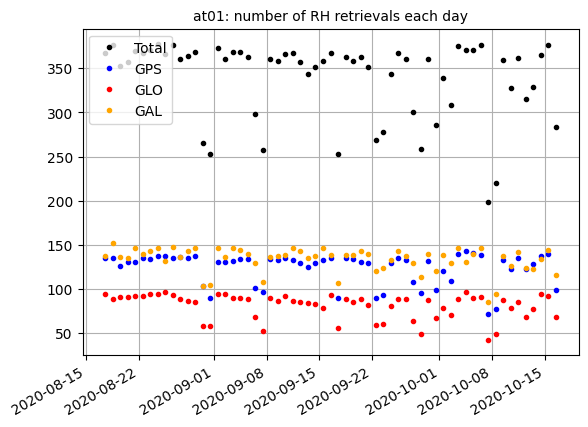

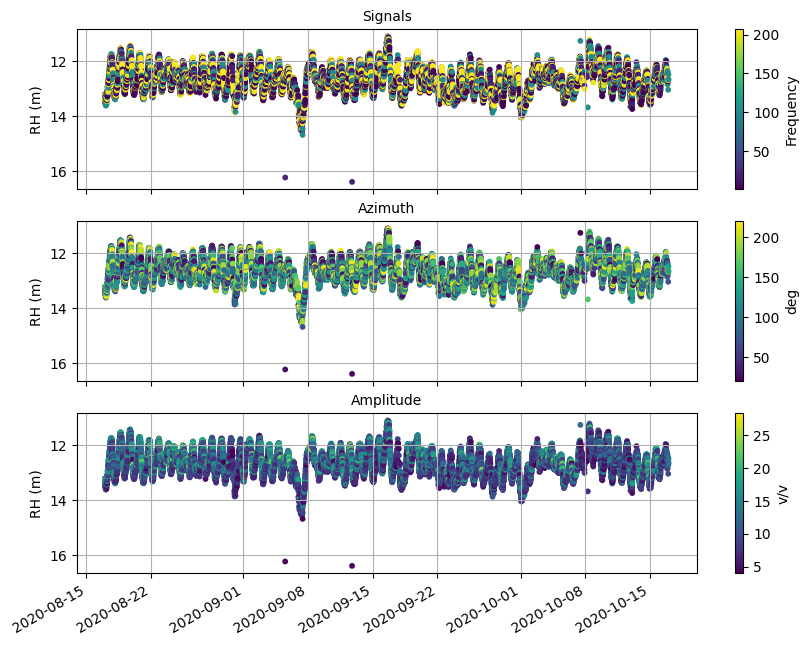

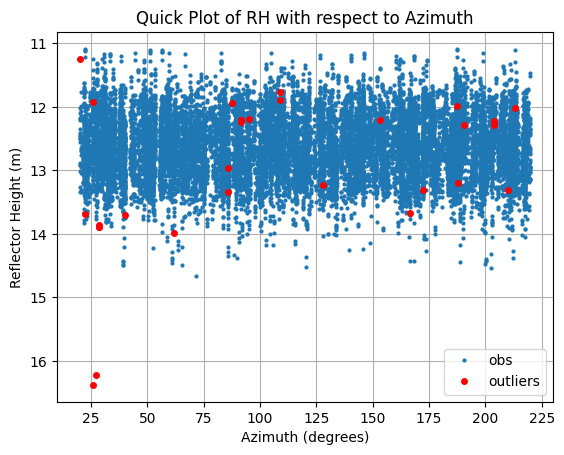

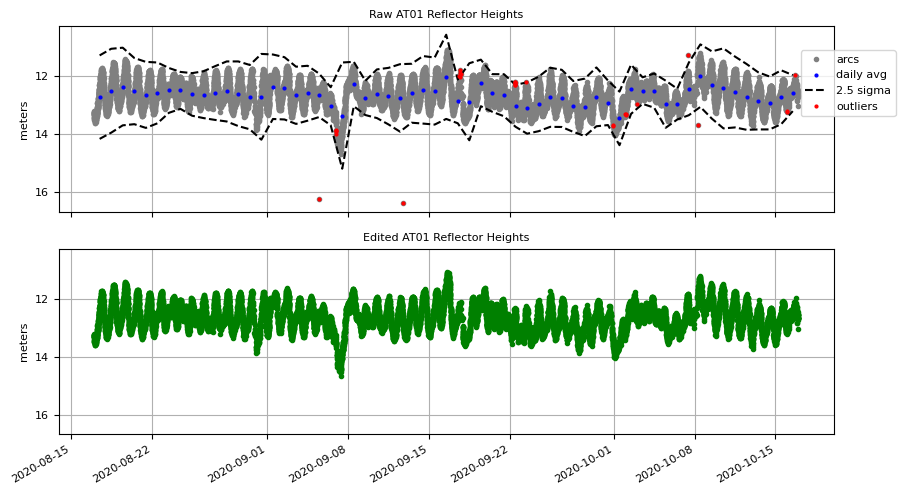

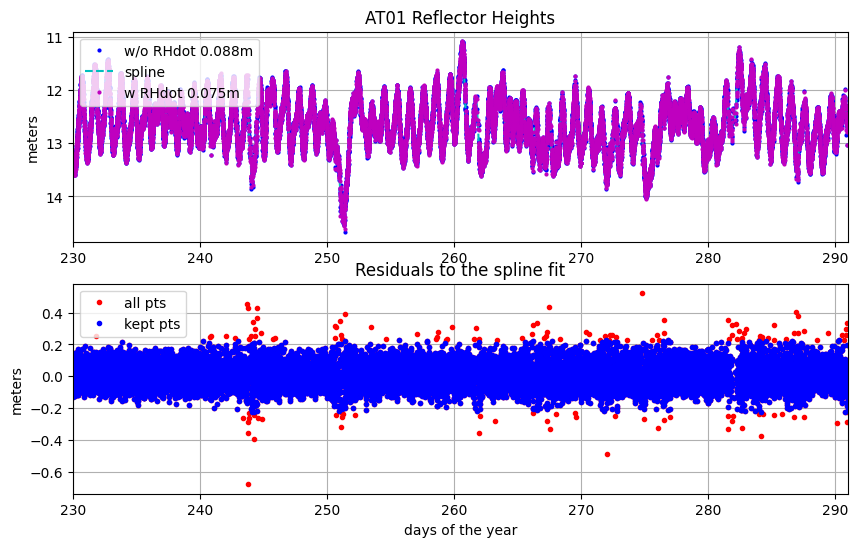

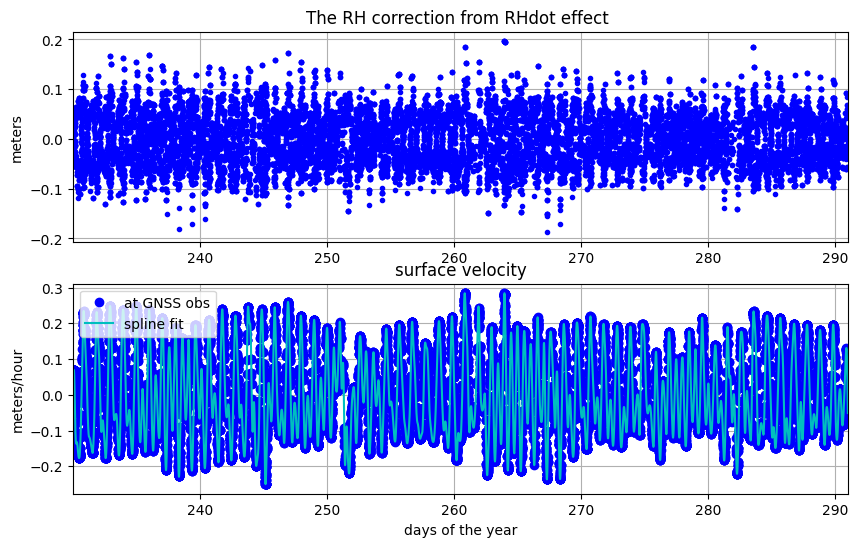

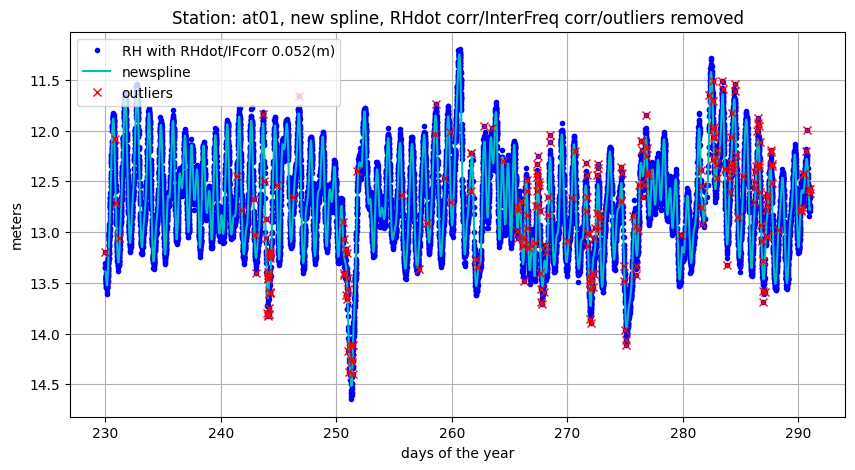

In [16]:
subdaily(station='at01', year=2020, doy1=230, doy2=290, plt=True)